# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, 
                          mouse_metadata,
                          on='Mouse ID',
                          how='left')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [33]:
# Checking the number of mice.
mouse_counts = mouse_study_df['Mouse ID'].nunique()
print(mouse_counts)


249


In [34]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_counts = mouse_study_df['Mouse ID'].value_counts()
print(mouse_counts)


g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_study_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] != 'g989']
clean_mouse_study_df.head()# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [36]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_counts = clean_mouse_study_df['Mouse ID'].nunique()
print(cleaned_mouse_counts)


248


## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean
mean_by_regimen_df = clean_mouse_study_df.groupby('Drug Regimen').mean()
mean_tumor_volume = mean_by_regimen_df['Tumor Volume (mm3)']
#median
median_by_regimen_df = clean_mouse_study_df.groupby('Drug Regimen').median()
median_tumor_volume = median_by_regimen_df['Tumor Volume (mm3)']
#variane
variance_by_regimen_df = clean_mouse_study_df.groupby('Drug Regimen').var()
tumor_volume_variance = variance_by_regimen_df['Tumor Volume (mm3)']
#standard deviation
std_by_regimen_df = clean_mouse_study_df.groupby('Drug Regimen').std()
tumor_volume_std = std_by_regimen_df['Tumor Volume (mm3)']
#standard error
sem_by_regimen_df = clean_mouse_study_df.groupby('Drug Regimen').sem()
tumor_volume_std_sem = sem_by_regimen_df['Tumor Volume (mm3)']

    
#Assemble the resulting series into a single summary DataFrame.
regimen_summary_df = pd.DataFrame({    
    'Mean Tumor Volume':mean_tumor_volume,
    'Median Tumor Volume':median_tumor_volume,
    'Tumor Volume Variance':tumor_volume_variance,
    'Tumor Volume Std. Dev.':tumor_volume_std,
    'Tumor Volume Std. Err.':tumor_volume_std_sem})
regimen_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_by_regimen_df = clean_mouse_study_df.groupby('Drug Regimen')
regimen_summary_agg = mouse_study_by_regimen_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
print(regimen_summary_agg)


                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

Text(0, 0.5, '# Of Observed Mouse Timepoints')

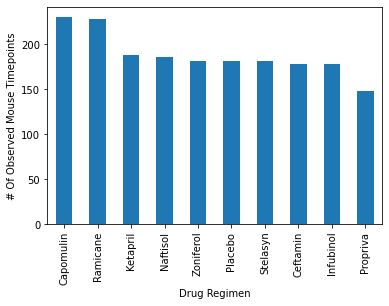

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_count = mouse_study_by_regimen_df['Drug Regimen'].count()

sorted_regimen_count = regimen_count.sort_values(ascending=False)

sorted_regimen_chart = sorted_regimen_count.plot.bar(x='Drug Regimen',y='', legend=False)
sorted_regimen_chart.set_ylabel("# Of Observed Mouse Timepoints")

In [40]:
type(regimen_count)

pandas.core.series.Series

I am colorblind, I think the color is Blue


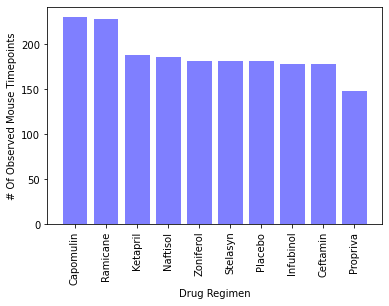

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Create a new dataframe of the variables we are looking to plot
timepoints = clean_mouse_study_df['Drug Regimen'].value_counts()
timepoints_df = timepoints.reset_index()
timepoints_df.columns = ['Drug Regimen','Timepoints']

x_axis = np.arange(len(timepoints_df))
tick_locations = [value+.4 for value in x_axis]

print("I am colorblind, I think the color is Blue")

plt.figure
plt.bar(x_axis, timepoints_df['Timepoints'], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, timepoints_df['Drug Regimen'], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed Mouse Timepoints")
plt.show()

<AxesSubplot:ylabel='Sex'>

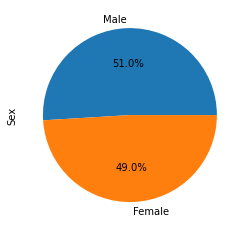

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_mouse_study_df['Sex'].value_counts()
sex_counts.plot.pie(autopct='%1.1f%%')


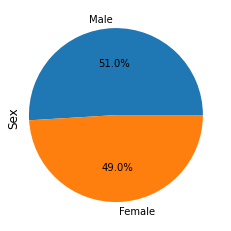

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_mouse_study_df['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Sex', loc='left',pad=-10,y=0.5, rotation=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
#create a new dataframe containing only the drugs we want

four_regimen = ['Capomulin','Ramicane','Infubinol','Ceftamin']
four_mouse_study_df = clean_mouse_study_df[clean_mouse_study_df['Drug Regimen'].isin(four_regimen)]

#groupby mouse ID and then keep only the rows that have max timepoint per mouse id

max_timepoint_index = four_mouse_study_df.groupby('Mouse ID')['Timepoint'].idxmax()
four_grouped_last_df = four_mouse_study_df.loc[max_timepoint_index]

In [45]:
# Put treatments into a list for for loop (and later for plot labels)

list_of_treatments = four_grouped_last_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes

tumor_data_Capomulin = []
tumor_data_Infubinol = []
tumor_data_Ramicane = []
tumor_data_Ceftamin = []

for index, row in four_grouped_last_df.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        tumor_data_Capomulin.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Infubinol':
        tumor_data_Infubinol.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Ramicane':
        tumor_data_Ramicane.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Ceftamin':
        tumor_data_Ceftamin.append(row['Tumor Volume (mm3)'])


#this cannot be the best way but I cannot run the .quiantile functrion on a list so I will mke four different df

capo_data = {'Capomulin':tumor_data_Capomulin}
capo_df = pd.DataFrame(capo_data)
capo = capo_df['Capomulin']
infu_data = {'Infubinol':tumor_data_Infubinol}
infu_df = pd.DataFrame(infu_data)
infu = infu_df['Infubinol']
rami_data = {'Ramicane':tumor_data_Ramicane}
rami_df = pd.DataFrame(rami_data)
rami = rami_df['Ramicane']
cefa_data = {'Ceftamin':tumor_data_Ceftamin}
cefa_df = pd.DataFrame(cefa_data)
cefa = cefa_df['Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

capo_quartiles = capo.quantile([.25,.5,.75])
infu_quartiles = infu.quantile([.25,.5,.75])
rami_quartiles = rami.quantile([.25,.5,.75])
cefa_quartiles = cefa.quantile([.25,.5,.75])

capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq-capo_lowerq
capo_lower_bound = capo_lowerq -(1.5*capo_iqr)
capo_upper_bound = capo_upperq +(1.5*capo_iqr)

infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq-infu_lowerq
infu_lower_bound = infu_lowerq -(1.5*infu_iqr)
infu_upper_bound = infu_upperq +(1.5*infu_iqr)


rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq-rami_lowerq
rami_lower_bound = rami_lowerq -(1.5*rami_iqr)
rami_upper_bound = rami_upperq +(1.5*rami_iqr)


cefa_lowerq = cefa_quartiles[0.25]
cefa_upperq = cefa_quartiles[0.75]
cefa_iqr = cefa_upperq-cefa_lowerq
cefa_lower_bound = cefa_lowerq -(1.5*cefa_iqr)
cefa_upper_bound = cefa_upperq +(1.5*cefa_iqr)


# Determine outliers using upper and lower bounds

only_capo_df = four_grouped_last_df[four_grouped_last_df['Drug Regimen'] == 'Capmulin']
only_infu_df = four_grouped_last_df[four_grouped_last_df['Drug Regimen'] == 'Infubinol' ]
only_rami_df = four_grouped_last_df[four_grouped_last_df['Drug Regimen'] == 'Ramicane']
only_cefa_df = four_grouped_last_df[four_grouped_last_df['Drug Regimen'] == 'Ceftamin']

outliers_capo_df = only_capo_df[(only_capo_df['Tumor Volume (mm3)'] <= capo_lower_bound) | (only_capo_df['Tumor Volume (mm3)'] >= capo_upper_bound)]
outliers_infu_df = only_infu_df[(only_infu_df['Tumor Volume (mm3)'] <= infu_lower_bound) | (only_infu_df['Tumor Volume (mm3)'] >= infu_upper_bound)]
outliers_rami_df = only_rami_df[(only_rami_df['Tumor Volume (mm3)'] <= rami_lower_bound) | (only_rami_df['Tumor Volume (mm3)'] >= rami_upper_bound)]
outliers_cefa_df = only_cefa_df[(only_cefa_df['Tumor Volume (mm3)'] <= cefa_lower_bound) | (only_cefa_df['Tumor Volume (mm3)'] >= cefa_upper_bound)]

tumor_outliers_Capomulin_mouse = outliers_capo_df['Mouse ID'].tolist()
tumor_outliers_Infubinol_mouse = outliers_infu_df['Mouse ID'].tolist()
tumor_outliers_Ramicane_mouse = outliers_rami_df['Mouse ID'].tolist()
tumor_outliers_Ceftamin_mouse = outliers_cefa_df['Mouse ID'].tolist()

tumor_outliers_Capomulin_volume = outliers_capo_df['Tumor Volume (mm3)'].tolist()
tumor_outliers_Infubinol_volume = outliers_infu_df['Tumor Volume (mm3)'].tolist()
tumor_outliers_Ramicane_volume = outliers_rami_df['Tumor Volume (mm3)'].tolist()
tumor_outliers_Ceftamin_volume = outliers_cefa_df['Tumor Volume (mm3)'].tolist()


print(f"Capomulin's potential outliers: {tumor_outliers_Capomulin_mouse},{tumor_outliers_Capomulin_volume}")
print(f"Infubinol's potential outliers: {tumor_outliers_Infubinol_mouse},{tumor_outliers_Infubinol_volume}")
print(f"Ramicane's potential outliers: {tumor_outliers_Ramicane_mouse},{tumor_outliers_Ramicane_volume}")
print(f"Ceftamin's potential outliers: {tumor_outliers_Ceftamin_mouse},{tumor_outliers_Ceftamin_volume}")

Capomulin's potential outliers: [],[]
Infubinol's potential outliers: ['c326'],[36.3213458]
Ramicane's potential outliers: [],[]
Ceftamin's potential outliers: [],[]


In [46]:
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

SyntaxError: EOL while scanning string literal (4063923083.py, line 1)

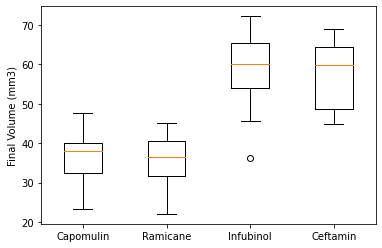

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data = [tumor_data_Capomulin, tumor_data_Ramicane, tumor_data_Infubinol, tumor_data_Ceftamin]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_ylabel('Final Volume (mm3)')
ax.set_xticklabels(['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.show()


## Line and Scatter Plots

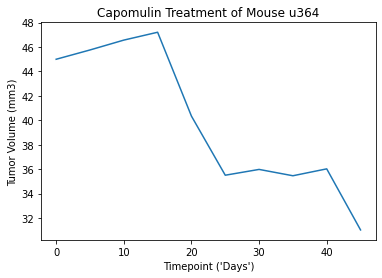

In [48]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_u364_df = clean_mouse_study_df[clean_mouse_study_df['Mouse ID'] == "u364"]
plt.plot(mouse_u364_df['Timepoint'],mouse_u364_df['Tumor Volume (mm3)'])
plt.xlabel("Timepoint ('Days')")
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse u364')
plt.show()


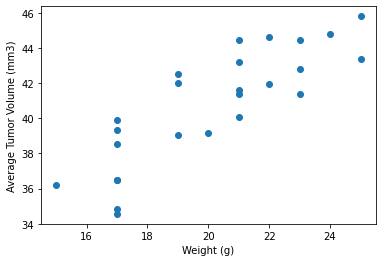

In [49]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#create a dataframe of the mice treated with capomuling
capomulin_df = clean_mouse_study_df[clean_mouse_study_df['Drug Regimen'] == "Capomulin"]

#group that dataframe by mouse id and take the mean for tumor volume
volume_mean = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#create a series of mean weight the same way
weight_mean = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

#combine the two lists into a dataframe
volume_weight_df = pd.concat([volume_mean, weight_mean], axis=1)


#plot the new dataframe
plt.scatter(weight_mean,volume_mean)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


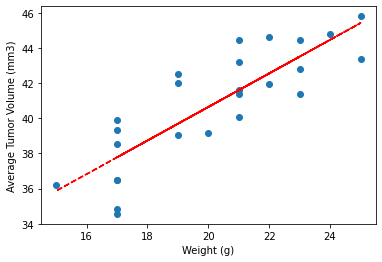

In [53]:
# Perform a linear regression on the weight and volume

from scipy import stats
c_slope, c_int, c_r, c_p, c_std_err = stats.linregress(weight_mean,volume_mean)
c_fit = c_slope * weight_mean+ c_int

#find the pearson correlation
r = volume_weight_df['Weight (g)'].corr(volume_weight_df['Tumor Volume (mm3)'], method='pearson')

print(f"The correlation between mouse weight and the average tumor volume is {r:.2f}")

plt.scatter(weight_mean,volume_mean)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(weight_mean, c_fit,"--",color="red")
plt.show()

